# Exploratory Data Analysis (EDA)

Goal:
- Understand the structure and quality of the transcript data
- Identify trends, anomalies, and candidate metrics
- Inform later analysis and visualization decisions


In [12]:
%load_ext autoreload
%autoreload 2

import sys
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

project_root = Path().resolve().parents[0]
sys.path.append(str(project_root))

from src.ingest import ingest
from src.clean import clean


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data Overview
Gain a basic understanding of the structure of the data.

In [13]:
path = Path(project_root) / "data" / "Transcript.csv"

df_raw = ingest(path)
df = clean(df_raw)

           Term      Course                            Desc Repeated  Units  \
0     2020 Fall    CMPT 128  Intro. Cmpt.Sci/Prgm/Engineers     EXCM      0   
1     2020 Fall   ENSC 100W  Engineering, Science & Society      NaN      3   
2     2020 Fall   ENSC 105W        Process of Prof. Writing      NaN      3   
3     2020 Fall    MATH 150        Calculus I with Review\r      NaN      4   
4     2020 Fall    PHYS 120    Mechanics and Modern Physics      NaN      3   
5   2021 Spring    ENSC 120        Intro to Instrumentation      NaN      2   
6   2021 Spring    ENSC 180  Introduction to Engineering An      NaN      3   
7   2021 Spring    MATH 152                     Calculus II      NaN      3   
8   2021 Spring    MATH 232          Applied Linear Algebra      NaN      3   
9   2021 Summer    CHEM 120             General Chemistry I      NaN      3   
10  2021 Summer    CHEM 125   STT-General Chemistry Lab I\r      NaN      1   
11  2021 Summer    MATH 260            Intro-Diff.Eq

In [14]:
df.head()

,Term,Course,Desc,Repeated,Units,Grade,GradePoints,ClassAverage,ClassEnrollment,GradePoint,ClassAvgGradePoint,Year,Dept,CourseLevel,Season,DifficultyIndex
0,2020 Fall,CMPT 128,Intro. Cmpt.Sci/Prgm/Engineers,EXCM,0,A-,0.00,C+,140,3.67,2.33,2020,CMPT,100,Fall,0.023388
1,2020 Fall,ENSC 100W,"Engineering, Science & Society",NaN,3,B+,9.99,B,138,3.33,3.00,2020,ENSC,100,Fall,-0.023551
2,2020 Fall,ENSC 105W,Process of Prof. Writing,NaN,3,A-,11.01,B,136,3.67,3.00,2020,ENSC,100,Fall,0.023388
3,2020 Fall,MATH 150,Calculus I with Review\r,NaN,4,B+,13.32,B-,278,3.33,2.67,2020,MATH,100,Fall,-0.023551
4,2020 Fall,PHYS 120,Mechanics and Modern Physics,NaN,3,B+,9.99,B-,263,3.33,2.67,2020,PHYS,100,Fall,-0.023551


In [15]:
df.tail()

,Term,Course,Desc,Repeated,Units,Grade,GradePoints,ClassAverage,ClassEnrollment,GradePoint,ClassAvgGradePoint,Year,Dept,CourseLevel,Season,DifficultyIndex
40,2025 Spring,CMPT 475,Requirements Engineering,NaN,3,A-,11.01,B,83,3.67,3.0,2025,CMPT,400,Spring,0.023388
41,2025 Spring,INDG 101,Intro to Indigenous Studies,NaN,3,B+,9.99,B,107,3.33,3.0,2025,INDG,100,Spring,-0.023551
42,2025 Summer,CMPT 428,Practicum III,NaN,0,P,0.00,-,46,0.00,0.0,2025,CMPT,400,Summer,-0.483275
43,2025 Fall,CMPT 383,Programming Langs.,NaN,3,B+,9.99,B,104,3.33,3.0,2025,CMPT,300,Fall,-0.023551
44,2025 Fall,POL 150,"Science, Policy and Innovation",NaN,3,B,9.00,B,55,3.00,3.0,2025,POL,100,Fall,-0.069109


In [16]:
df.shape

(45, 16)

In [17]:
df.columns

Index(['Term', 'Course', 'Desc', 'Repeated', 'Units', 'Grade', 'GradePoints',
       'ClassAverage', 'ClassEnrollment', 'GradePoint', 'ClassAvgGradePoint',
       'Year', 'Dept', 'CourseLevel', 'Season', 'DifficultyIndex'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Term                45 non-null     object 
 1   Course              45 non-null     object 
 2   Desc                45 non-null     object 
 3   Repeated            2 non-null      object 
 4   Units               45 non-null     int64  
 5   Grade               45 non-null     object 
 6   GradePoints         45 non-null     float64
 7   ClassAverage        45 non-null     object 
 8   ClassEnrollment     45 non-null     int64  
 9   GradePoint          45 non-null     float64
 10  ClassAvgGradePoint  45 non-null     float64
 11  Year                45 non-null     int64  
 12  Dept                45 non-null     object 
 13  CourseLevel         45 non-null     int64  
 14  Season              45 non-null     object 
 15  DifficultyIndex     45 non-null     float64
dtypes: float64

In [19]:
df_grade_filtered = df[(df["Grade"] != "P") & (df["Repeated"] != "EXCM")]
df_grade_filtered

,Term,Course,Desc,Repeated,Units,Grade,GradePoints,ClassAverage,ClassEnrollment,GradePoint,ClassAvgGradePoint,Year,Dept,CourseLevel,Season,DifficultyIndex
1,2020 Fall,ENSC 100W,"Engineering, Science & Society",NaN,3,B+,9.99,B,138,3.33,3.00,2020,ENSC,100,Fall,-0.023551
2,2020 Fall,ENSC 105W,Process of Prof. Writing,NaN,3,A-,11.01,B,136,3.67,3.00,2020,ENSC,100,Fall,0.023388
3,2020 Fall,MATH 150,Calculus I with Review\r,NaN,4,B+,13.32,B-,278,3.33,2.67,2020,MATH,100,Fall,-0.023551
4,2020 Fall,PHYS 120,Mechanics and Modern Physics,NaN,3,B+,9.99,B-,263,3.33,2.67,2020,PHYS,100,Fall,-0.023551
6,2021 Spring,ENSC 180,Introduction to Engineering An,NaN,3,B+,9.99,B,114,3.33,3.00,2021,ENSC,100,Spring,-0.023551
7,2021 Spring,MATH 152,Calculus II,NaN,3,B,9.00,B-,328,3.00,2.67,2021,MATH,100,Spring,-0.069109
8,2021 Spring,MATH 232,Applied Linear Algebra,NaN,3,B+,9.99,B-,236,3.33,2.67,2021,MATH,200,Spring,-0.023551
9,2021 Summer,CHEM 120,General Chemistry I,NaN,3,B-,8.01,B-,311,2.67,2.67,2021,CHEM,100,Summer,-0.114667
10,2021 Summer,CHEM 125,STT-General Chemistry Lab I\r,NaN,1,C+,2.33,B+,189,2.33,3.33,2021,CHEM,100,Summer,-0.161606
11,2021 Summer,MATH 260,Intro-Diff.Equations,NaN,3,B,9.00,B-,113,3.00,2.67,2021,MATH,200,Summer,-0.069109


Observations:
- Data appears to have no missing values
- Data was filtered to only include classes that count towards GPA for better analysis (Pass/fail and repeats excluded)

# Grade Distribution
Examine my overall grade distribtuion and the grade distribution of the averages.

In [20]:
df_grade_filtered["GradePoint"].describe()

count    40.000000
mean      3.482500
std       0.465666
min       2.330000
25%       3.330000
50%       3.330000
75%       3.752500
max       4.330000
Name: GradePoint, dtype: float64

<Axes: >

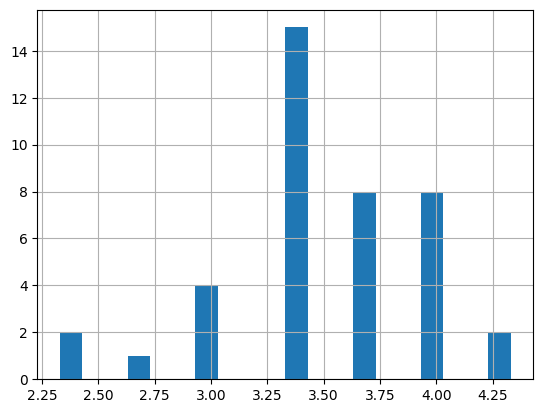

In [21]:
df_grade_filtered["GradePoint"].hist(bins=20)

<Axes: >

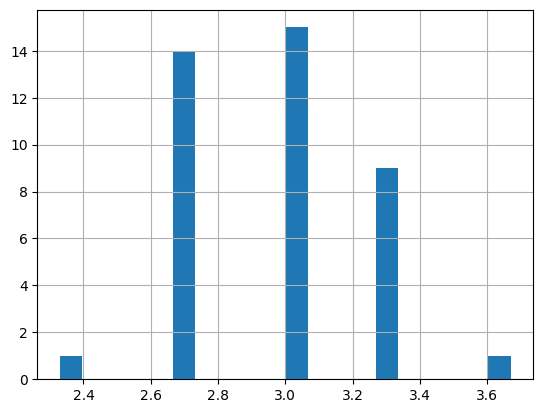

In [22]:
df_grade_filtered["ClassAvgGradePoint"].hist(bins=20)

<Axes: xlabel='GradePoint'>

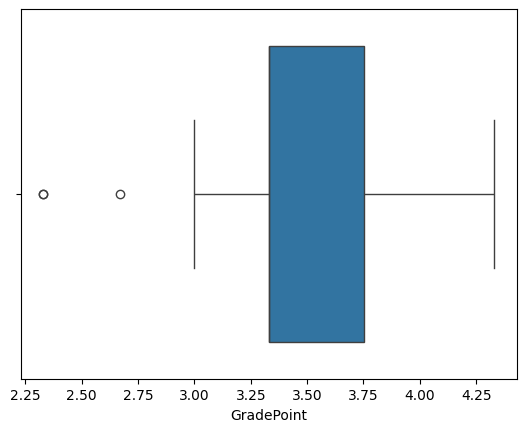

In [23]:
sns.boxplot(x=df_grade_filtered["GradePoint"])


<Axes: xlabel='ClassAvgGradePoint'>

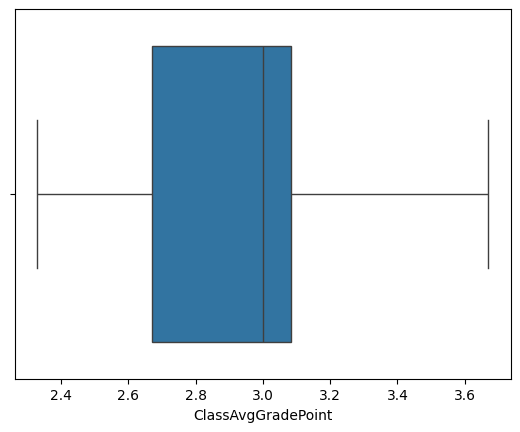

In [24]:
sns.boxplot(x=df_grade_filtered["ClassAvgGradePoint"])

Observations:
- My most median grade has been a B+ (3.33)
- My grades are highly clustered within the 3.33 to 3.75 range, with a couple outliers at 2.33 and 2.67
- Most of my classes had an average around a B (3.00) or B- (2.67)

# GPA over Time, Semester, Department, and Course Level
Examine grade averages by year, semester, season, department, and course level and look for any trends or outliers.

In [25]:
df_grade_filtered.groupby("Year")["GradePoint"].mean()

Year
2020    3.415000
2021    3.132000
2022    3.890000
2023    3.497500
2024    3.700000
2025    3.331667
Name: GradePoint, dtype: float64

In [26]:
df_grade_filtered.groupby("Term")["GradePoint"].mean()

Term
2020 Fall      3.415000
2021 Fall      4.000000
2021 Spring    3.220000
2021 Summer    2.732000
2022 Fall      3.890000
2022 Spring    4.000000
2022 Summer    3.670000
2023 Spring    3.497500
2024 Fall      4.000000
2024 Spring    3.667500
2024 Summer    3.443333
2025 Fall      3.165000
2025 Spring    3.415000
Name: GradePoint, dtype: float64

In [27]:
df_grade_filtered.groupby("Season")["GradePoint"].mean()

Season
Fall      3.690000
Spring    3.528235
Summer    3.073333
Name: GradePoint, dtype: float64

In [28]:
df_grade_filtered.groupby("Dept")["GradePoint"].mean()

Dept
CA      3.165000
CHEM    2.500000
CMPT    3.758333
ENSC    3.443333
GSWS    3.330000
IAT     3.670000
INDG    3.330000
MACM    3.670000
MATH    3.165000
PHYS    3.330000
POL     3.000000
PSYC    2.330000
STAT    4.000000
Name: GradePoint, dtype: float64

In [29]:
df_grade_filtered.groupby("CourseLevel")["GradePoint"].mean()

CourseLevel
100    3.253529
200    3.667500
300    3.574545
400    3.832500
Name: GradePoint, dtype: float64

In [30]:
df_grade_filtered.groupby("Dept")["Term"].count()

Dept
CA       2
CHEM     2
CMPT    18
ENSC     3
GSWS     1
IAT      1
INDG     1
MACM     3
MATH     4
PHYS     2
POL      1
PSYC     1
STAT     1
Name: Term, dtype: int64

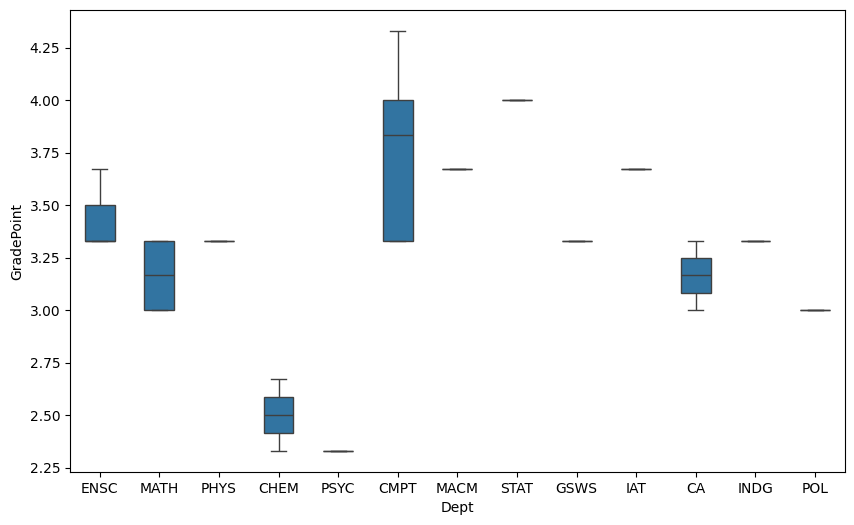

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Dept", y="GradePoint", data=df_grade_filtered, width=0.5)
plt.show()

In [32]:
df_grade_filtered.groupby("Term")["Units"].sum()

Term
2020 Fall      13
2021 Fall       6
2021 Spring     9
2021 Summer    13
2022 Fall       9
2022 Spring     6
2022 Summer     3
2023 Spring    12
2024 Fall       9
2024 Spring    12
2024 Summer     9
2025 Fall       6
2025 Spring    12
Name: Units, dtype: int64

<Axes: xlabel='Units', ylabel='GradePoint'>

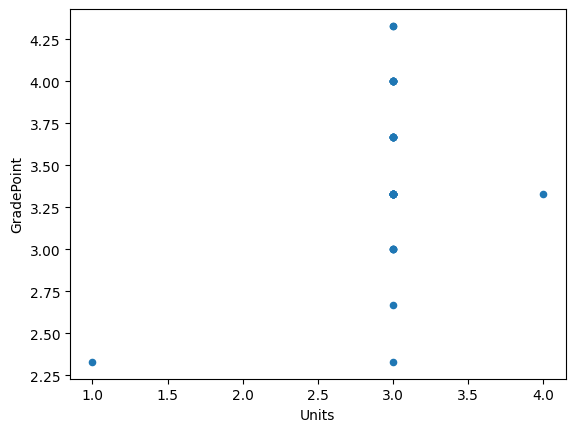

In [33]:
df_grade_filtered.plot.scatter(x="Units", y="GradePoint")

In [52]:
df_grade_filtered[["GradePoint", "Units", "CourseLevel", "Year", "ClassAvgGradePoint"]].corr()

,GradePoint,Units,CourseLevel,Year,ClassAvgGradePoint
GradePoint,1.000000,0.331848,0.399884,0.188538,-0.162039
Units,0.331848,1.000000,0.071049,0.025695,-0.253196
CourseLevel,0.399884,0.071049,1.000000,0.660280,0.140716
Year,0.188538,0.025695,0.660280,1.000000,0.362507
ClassAvgGradePoint,-0.162039,-0.253196,0.140716,0.362507,1.000000


Observations:
- Fall semester was my best performing semester on average
- A majority of my courses were CMPT
- I tend to perform better in 400 level courses than all others, 100 level courses have my lowest average. Correlation of ~0.4
- I am not good at Psychology 

Follow up:
- Define a difficulty index for courses and departments
- Weight GPA by credit load for final analysis
- Heatmap for correlation

# Performance comparison
Compare my performance to class averages over the year, semester, department, and course level.

<Axes: xlabel='Term', ylabel='GPATerm'>

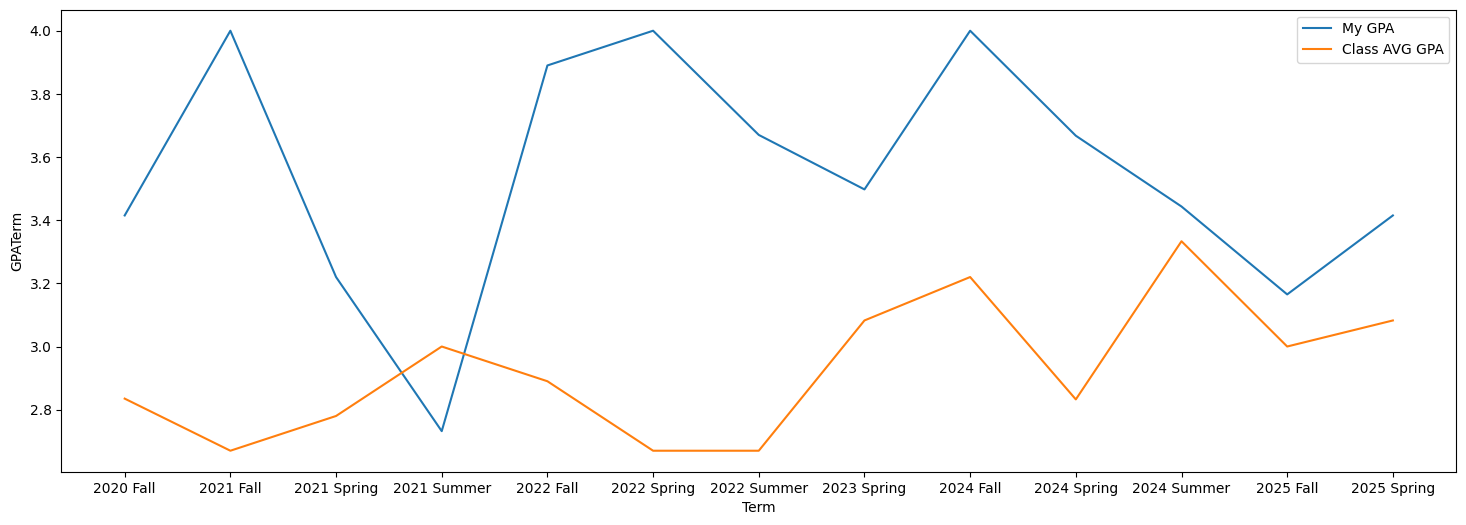

In [47]:
df_term_gpa_class_avg = df_grade_filtered.groupby("Term")["ClassAvgGradePoint"].mean().reset_index(name="ClassAvgGPATerm")
df_term_gpa = df_grade_filtered.groupby("Term")["GradePoint"].mean().reset_index(name="GPATerm")
plt.figure(figsize=(18,6))
sns.lineplot(data=df_term_gpa, x="Term", y="GPATerm", label="My GPA")
sns.lineplot(data=df_term_gpa_class_avg, x="Term", y="ClassAvgGPATerm", label="Class AVG GPA")

<Axes: xlabel='Year', ylabel='GPAYear'>

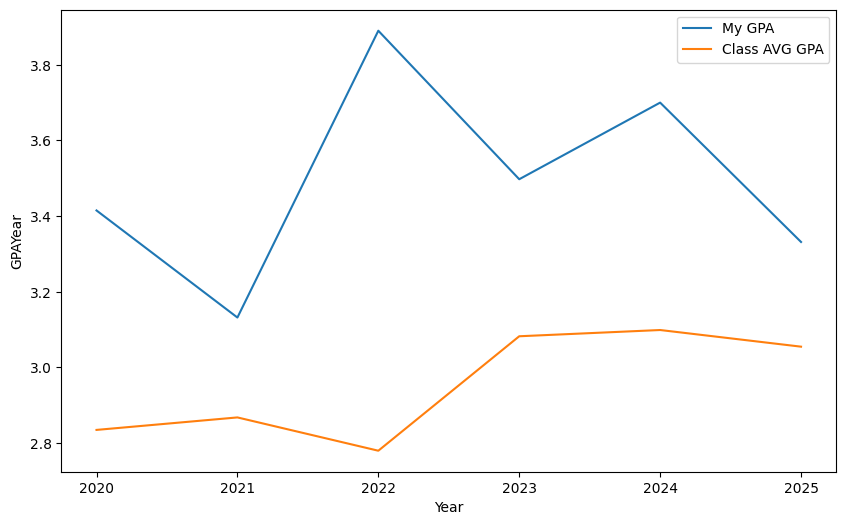

In [48]:
df_term_gpa_class_avg = df_grade_filtered.groupby("Year")["ClassAvgGradePoint"].mean().reset_index(name="ClassAvgGPAYear")
df_term_gpa = df_grade_filtered.groupby("Year")["GradePoint"].mean().reset_index(name="GPAYear")
plt.figure(figsize=(10,6))
sns.lineplot(data=df_term_gpa, x="Year", y="GPAYear", label="My GPA")
sns.lineplot(data=df_term_gpa_class_avg, x="Year", y="ClassAvgGPAYear", label="Class AVG GPA")

<Axes: xlabel='Dept', ylabel='GPADept'>

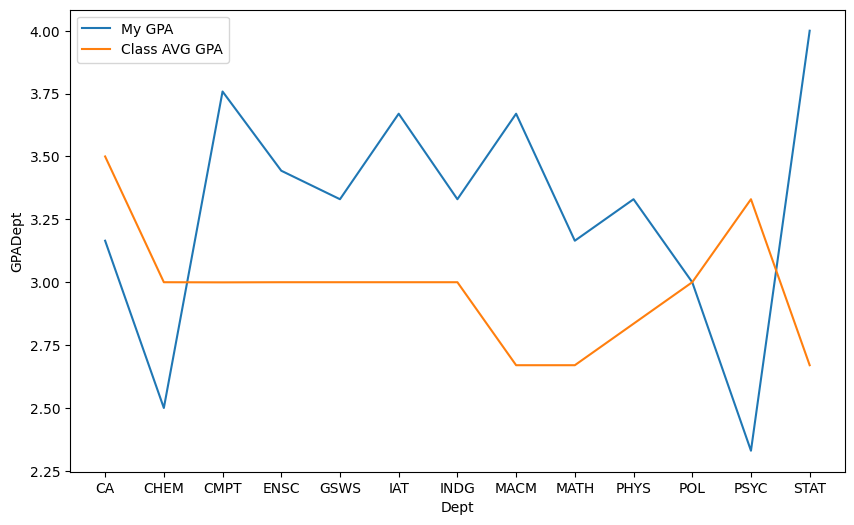

In [49]:
df_term_gpa_class_avg = df_grade_filtered.groupby("Dept")["ClassAvgGradePoint"].mean().reset_index(name="ClassAvgGPADept")
df_term_gpa = df_grade_filtered.groupby("Dept")["GradePoint"].mean().reset_index(name="GPADept")
plt.figure(figsize=(10,6))
sns.lineplot(data=df_term_gpa, x="Dept", y="GPADept", label="My GPA")
sns.lineplot(data=df_term_gpa_class_avg, x="Dept", y="ClassAvgGPADept", label="Class AVG GPA")

<Axes: xlabel='CourseLevel', ylabel='GPACourseLevel'>

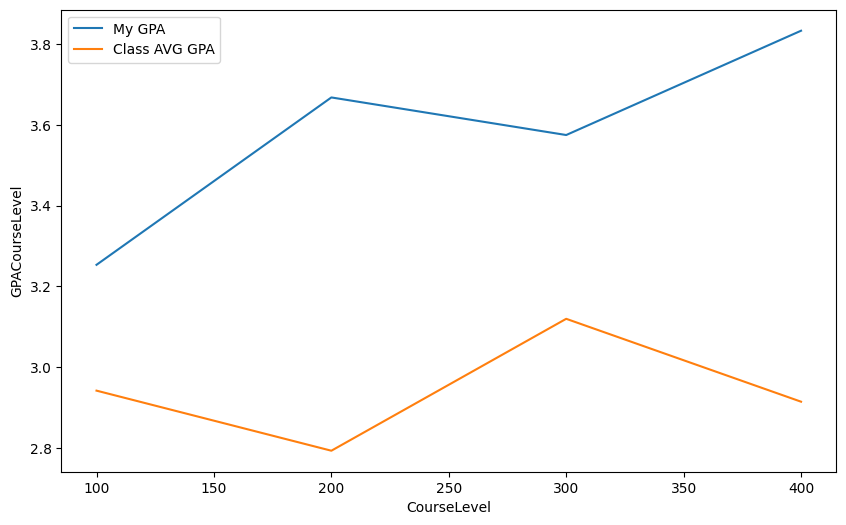

In [50]:
df_term_gpa_class_avg = df_grade_filtered.groupby("CourseLevel")["ClassAvgGradePoint"].mean().reset_index(name="ClassAvgGPACourseLevel")
df_term_gpa = df_grade_filtered.groupby("CourseLevel")["GradePoint"].mean().reset_index(name="GPACourseLevel")
plt.figure(figsize=(10,6))
sns.lineplot(data=df_term_gpa, x="CourseLevel", y="GPACourseLevel", label="My GPA")
sns.lineplot(data=df_term_gpa_class_avg, x="CourseLevel", y="ClassAvgGPACourseLevel", label="Class AVG GPA")

Observations:
- Most of the time I tend to outperform the averages in my classes.
- Again, 400 level courses seem to be my best performing.
- My worst semester Summer 2021 was all online and included no classes from my major, possible explanation for poor performance.
- The one course in STAT I took I did really well in compared to the average.
- Once again, I am bad at Pyschology

Follow up:
- Have the terms sorted in order so that they appear in chronological order

# Difficulty Analysis
Examine which courses were the easiest and most difficult for me based on a calculated Z-Score

In [44]:
display_cols = ["Term", "Course", "Desc", "Repeated", "Units", "Grade", "ClassAverage", "DifficultyIndex"]

In [45]:
df_grade_filtered.nlargest(10, "DifficultyIndex")[display_cols]

,Term,Course,Desc,Repeated,Units,Grade,ClassAverage,DifficultyIndex
14,2021 Fall,CMPT 120,Intro.Cmpt.Sci/Programming I,REIG,3,A+,B-,0.114505
37,2024 Fall,CMPT 454,Database Systems II,NaN,3,A+,B,0.114505
16,2022 Spring,CMPT 125,Intro.Cmpt.Sci/Programming II,NaN,3,A,B-,0.068946
17,2022 Spring,STAT 270,Probability and Statistics,NaN,3,A,B-,0.068946
19,2022 Fall,CMPT 276,Intro Software Engineering,NaN,3,A,B+,0.068946
20,2022 Fall,CMPT 295,Intro. to Computer Systems\r,NaN,3,A,B-,0.068946
22,2023 Spring,CMPT 300,Operating Systems I,NaN,3,A,B,0.068946
28,2024 Spring,CMPT 310,Intro Artificial Intelligence,NaN,3,A,B+,0.068946
33,2024 Summer,CMPT 354,Database Systems I,NaN,3,A,B,0.068946
36,2024 Fall,CMPT 410,Machine Learning,NaN,3,A,B+,0.068946


In [46]:
df_grade_filtered.nsmallest(10, "DifficultyIndex")[display_cols]

,Term,Course,Desc,Repeated,Units,Grade,ClassAverage,DifficultyIndex
10,2021 Summer,CHEM 125,STT-General Chemistry Lab I\r,NaN,1,C+,B+,-0.161606
13,2021 Summer,PSYC 100,Intro.Psychology I,NaN,3,C+,B+,-0.161606
9,2021 Summer,CHEM 120,General Chemistry I,NaN,3,B-,B-,-0.114667
7,2021 Spring,MATH 152,Calculus II,NaN,3,B,B-,-0.069109
11,2021 Summer,MATH 260,Intro-Diff.Equations,NaN,3,B,B-,-0.069109
32,2024 Summer,CA 149,Sound,NaN,3,B,A-,-0.069109
44,2025 Fall,POL 150,"Science, Policy and Innovation",NaN,3,B,B,-0.069109
1,2020 Fall,ENSC 100W,"Engineering, Science & Society",NaN,3,B+,B,-0.023551
3,2020 Fall,MATH 150,Calculus I with Review\r,NaN,4,B+,B-,-0.023551
4,2020 Fall,PHYS 120,Mechanics and Modern Physics,NaN,3,B+,B-,-0.023551


Observations:
- My 10 best classes are in the Computer Science, for the top two highest one is a 100 level and the other is a 400 level course
- My 10 weakest course are not Computer Science related. They are mainly made up of electives and general math courses. 